## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

I'm going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling

## 1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci


`The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what I will use to predict our target variable.

we use the independent variables to predict our dependent variable.
Here, the independent variables are a patients different medical attributes and the dependent variable(i.e target) is whether or not they have heart disease.`


## 3. Evaluation

" If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project."


## 4. Features

` Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.`

`One of the most common ways to do this, is to create a data dictionar


### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools I need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


# for our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("C:\\Users\\Ope\\Documents\\workable_csv_e\\6.1 heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Checking the of the data to know how bid it is
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Visualization

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

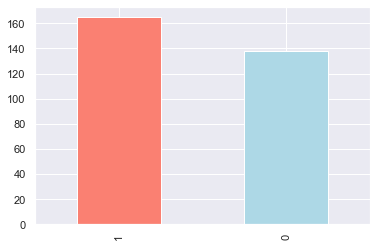

In [8]:
# This shows the comparison betwwen men and women who have heart disease
targ= df.target.value_counts()
targ.plot(kind='bar', color=['salmon', 'lightblue']);

### Visualizing Heart Disease Frequency according to Sex

In [9]:
sex_targ =pd.crosstab(df.target, df.sex)
sex_targ

sex,0,1
target,,
0,24,114
1,72,93


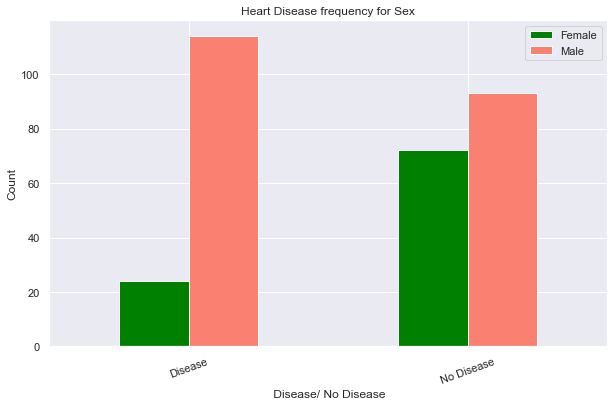

In [10]:
# let's visualize this:

sex_targ.plot(kind='bar', figsize=(10,6),
              color=['green', 'salmon'])

plt.title('Heart Disease frequency for Sex')
plt.xlabel(' Disease/ No Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks([0, 1,], ['Disease','No Disease'],
    rotation=20);

## Age vs. Max Heart Rate for Heart Disease

In [11]:
pd.crosstab(df.thalach, df.target)


target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


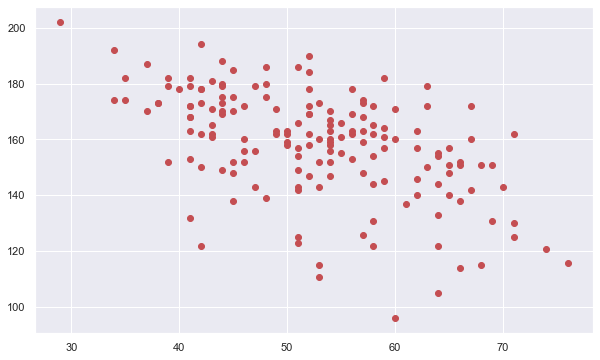

In [12]:
plt.figure(figsize=(10,6))
# Scatter with positive examples(i.e 1)
# x_axis= age of those with heart disease
# y_axis= max heart rate of those with heart disease

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='r')


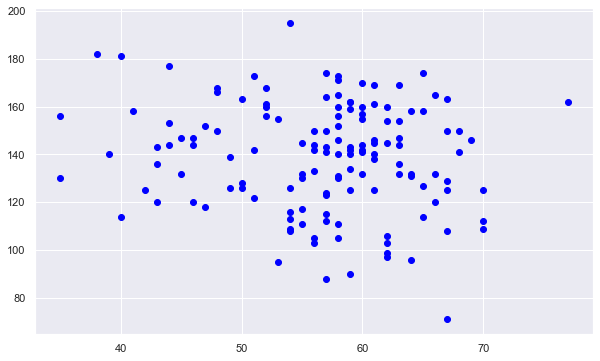

In [13]:
# scatter with negatives examples(i.e no disease)
plt.figure(figsize=(10,6))

# x_axis= age of those without heart disease
# y_axis= max heart rate of those without heart disease


plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='blue')

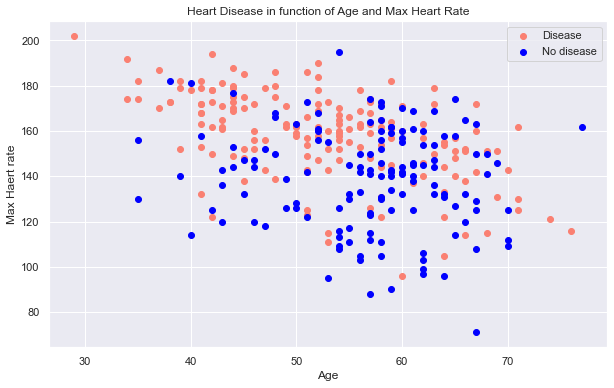

In [14]:
# create combined figure
plt.figure(figsize=(10,6))

# ** Scatter with positive examples(i.e 1)

# x= age of those with heart disease
#y= max heart rate of those with heart disease

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negatives examples(i.e no disease)

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='blue')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Haert rate')
plt.legend(['Disease', 'No disease']);

### Heart Disease Frequency per Chest Pain Type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [15]:
cp_targ = pd.crosstab(df.cp, df.target)
cp_targ

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


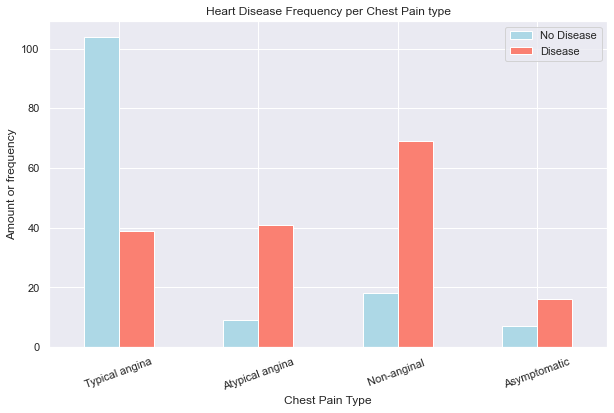

In [16]:
cp_targ.plot(kind='bar', figsize=(10,6),
            color=['lightblue', 'salmon'])

plt.title('Heart Disease Frequency per Chest Pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount or frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks([0, 1, 2, 3], ['Typical angina', 'Atypical angina', 'Non-anginal ', 'Asymptomatic'],
    rotation=20)  ;

## Outliers detection and removal

Old Shape:  (303, 14)


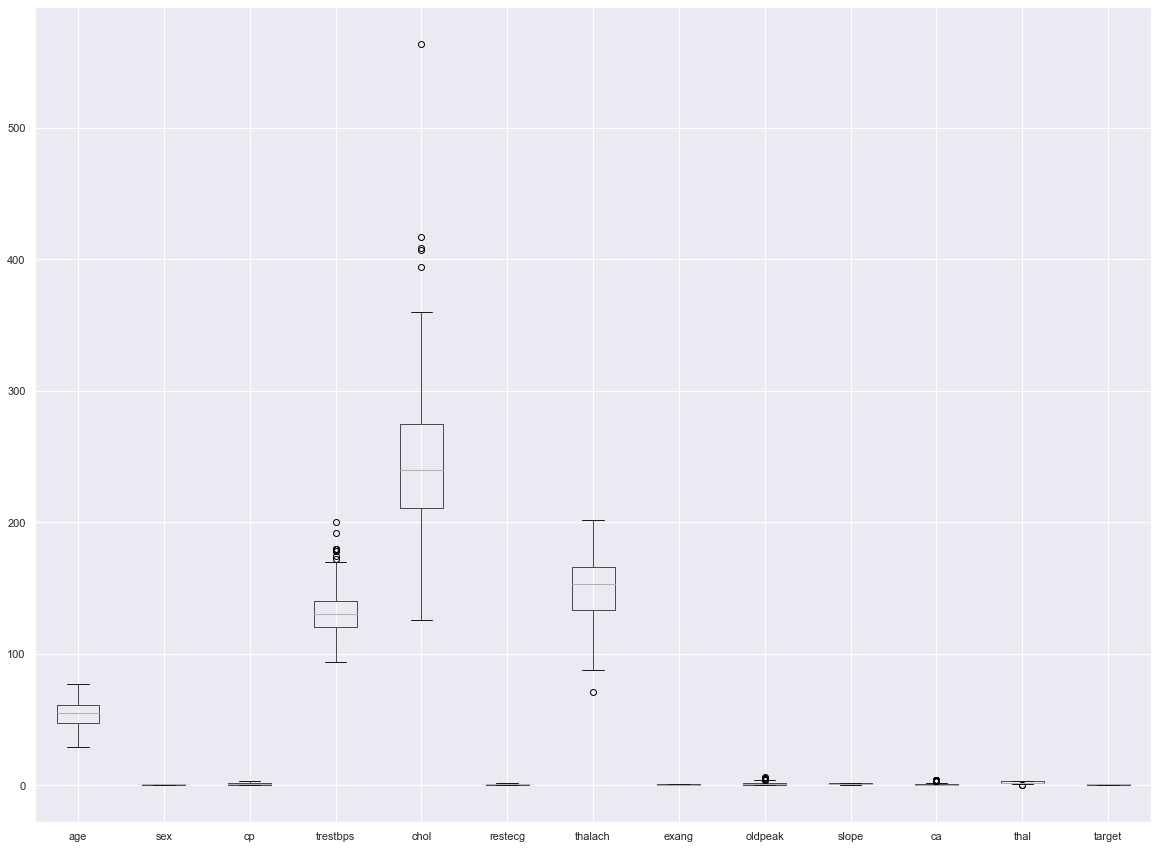

In [17]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol','restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(20,15))
df.boxplot(column=cols);

print("Old Shape: ", df.shape)

### This dataset has some outliers which I will remove below:

Old Shape:  (303, 14)
New Shape:  (261, 14)


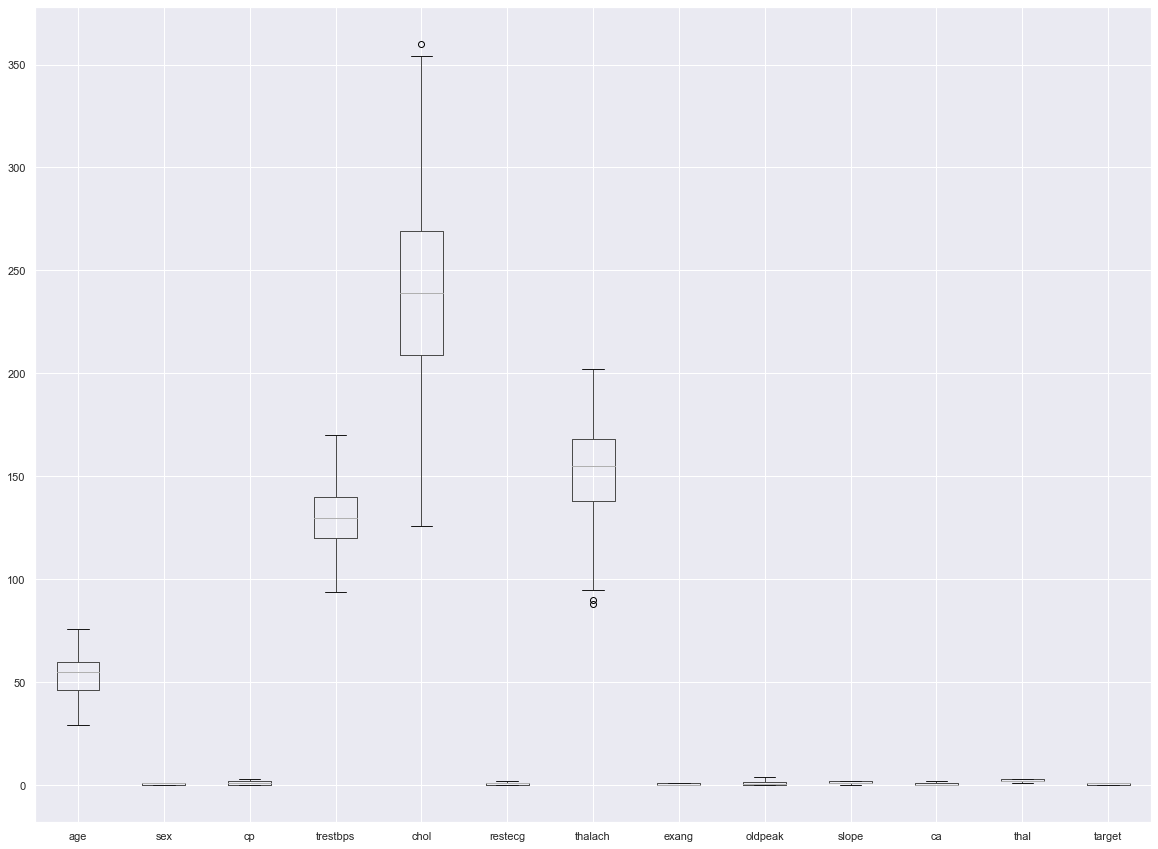

In [18]:
print("Old Shape: ", df.shape)

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

 
plt.figure(figsize=(20,15))
df.boxplot(column=cols)

print("New Shape: ", df.shape)
 

### Correlation Matrix

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073351,-0.035241,0.278920,0.133812,0.129412,-0.093388,-0.402763,0.087981,0.196866,-0.142630,0.384780,0.065053,-0.200652
sex,-0.073351,1.000000,-0.095629,0.004428,-0.136354,0.058807,-0.085572,-0.057410,0.173593,0.169247,-0.061194,0.089277,0.250717,-0.326947
cp,-0.035241,-0.095629,1.000000,0.107239,-0.036392,0.144697,0.064762,0.275477,-0.374546,-0.121328,0.079260,-0.210705,-0.186138,0.404529
trestbps,0.278920,0.004428,0.107239,1.000000,0.095666,0.137721,-0.130787,-0.039151,-0.015670,0.155010,-0.059844,0.056375,-0.007052,-0.088727
chol,0.133812,-0.136354,-0.036392,0.095666,1.000000,-0.020748,-0.120110,0.004277,0.050308,-0.025590,0.055914,0.087311,0.078786,-0.081495
fbs,0.129412,0.058807,0.144697,0.137721,-0.020748,1.000000,-0.080167,-0.009086,-0.009135,0.024096,-0.081466,0.115061,-0.077256,-0.002147
restecg,-0.093388,-0.085572,0.064762,-0.130787,-0.120110,-0.080167,1.000000,0.066547,-0.091047,-0.089314,0.120631,-0.081091,0.057675,0.144633
thalach,-0.402763,-0.057410,0.275477,-0.039151,0.004277,-0.009086,0.066547,1.000000,-0.418355,-0.338750,0.372933,-0.247480,-0.139463,0.403880
exang,0.087981,0.173593,-0.374546,-0.015670,0.050308,-0.009135,-0.091047,-0.418355,1.000000,0.348314,-0.265311,0.185935,0.250552,-0.425255
oldpeak,0.196866,0.169247,-0.121328,0.155010,-0.025590,0.024096,-0.089314,-0.338750,0.348314,1.000000,-0.527422,0.277341,0.183205,-0.439291


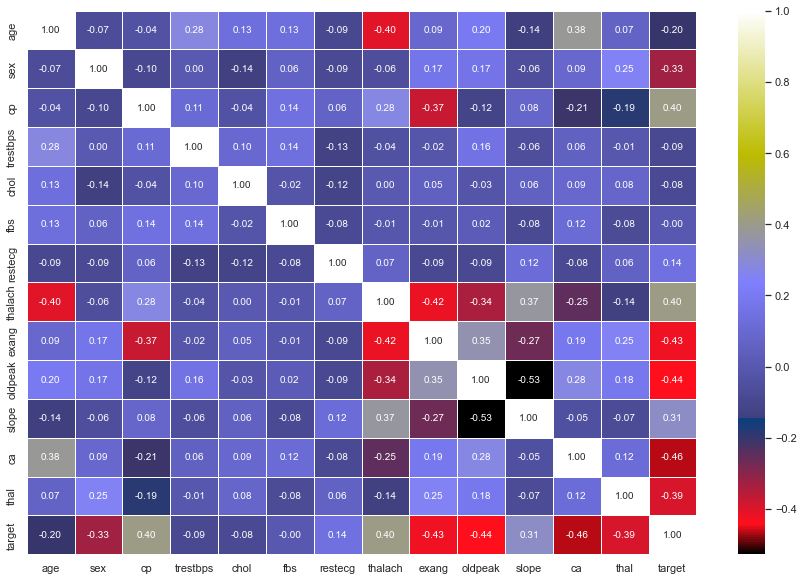

In [20]:
# Visualizing the correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='gist_stern')


### Creating Machine Learning Model.

In [32]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0


In [34]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2)


In [36]:
len(X_train), len(y_train), len(y_test)

(242, 242, 61)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

I'll train it (find the patterns) on the training set.

And I'll test it (use the patterns) on the test set.

I will try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [37]:
# put the models ina dictionary.

models = {'Logistic Regression': LogisticRegression(max_iter=1000),
         'KNN': KNeighborsClassifier(),
         'RF': RandomForestClassifier()}

# Create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    models : a dict of sklearn model
    X_train :  training data (no label)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    # make a dict to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        #evaluate the models and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
  

In [38]:
model_scores = fit_and_score(models= models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test= X_test,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RF': 0.8360655737704918}

## Baseline Model Comparison

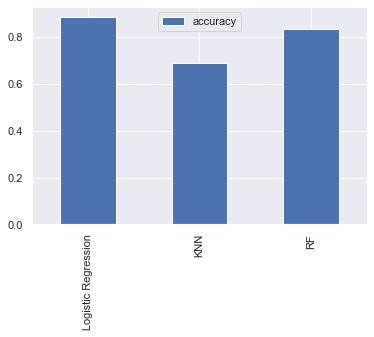

In [40]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Experimentation (Hyperparameter tuning.)

In [41]:
# KNN tuning
# This is Hypertuning by hand anyway.

train_scores = []
test_scores = []
# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
     # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
 

Maximum KNN score on the test data: 75.41%


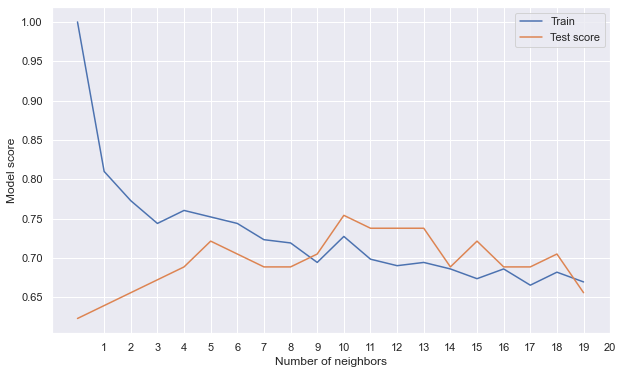

In [42]:
plt.figure(figsize=(10,6))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label= 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')



### Hyperparameter tuning with RandomizedSearchCV.

In [43]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [46]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
log_reg.score(X_test, y_test)

0.8852459016393442

In [49]:
# Tune RandomForest

# setup random seed for result to be reproduceable
np.random.seed(42)

rf_model = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv =5,
                             n_iter=20,
                             verbose=True)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [52]:
# Find the best hyperparameters
rf_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [53]:
# Evaluate the randomized search RandomForestClassifier model
rf_model.score(X_test, y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV.

#### LogisticRegression proves to be the best model so far, I'll try to improve it with GridsearchCV.

In [57]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
GS_logR_model = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
GS_logR_model.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [59]:
GS_logR_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
GS_logR_model.score(X_test, y_test)

0.8852459016393442

### Evaluating our trained machine learning classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1-score

In [95]:
# Make predictions with tuned model
y_preds = GS_logR_model.predict(X_test)
# evaluate the pred
Gs_metrics = evaluate_preds(y_test, y_preds)

NameError: name 'evaluate_preds' is not defined

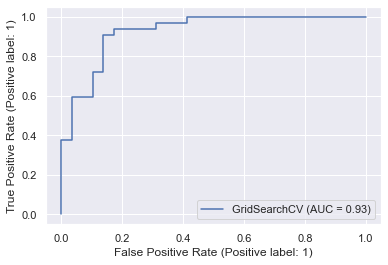

In [65]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(GS_logR_model, X_test, y_test);

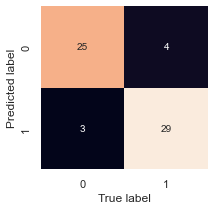

In [66]:
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm,
            annot=True,
            cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
#### Here, I will calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so I'll be using `cross_val_score().`

In [68]:
# Check best hyperparameters
GS_logR_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# Create a final model with best parameters
model = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [70]:
# Cross-validated accuracy

cv_acc = cross_val_score(model,X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [71]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [73]:
# Cross-validated rcall
cv_recall = cross_val_score(model,X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall



array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [78]:
cv_recall = np.mean(cv_recall)

In [76]:
# Cross-validated F1
cv_f1= cross_val_score(model,X,
                   y,
                        cv=5,
                        scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [77]:
cv_f1 = np.mean(cv_f1)

In [80]:
# Cross-validated precision
cv_precision = cross_val_score(model,X,
                        y,
                        cv=5,
                        scoring='precision')

In [81]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

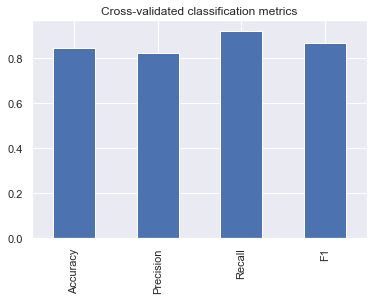

In [84]:
# let's visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature importance
Feature importance is as asking 'which feature contributed most to the outcome of the model and how did they contribute?'
note: finding feature importance is different foe each ML model

`Like a correlation matrix, feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model.`

In [85]:
model = LogisticRegression(C = 0.20433597178569418, 
                          solver='liblinear')

model.fit(X_train, y_train);

In [ ]:
mode

In [86]:

model.coef_, model.intercept_

(array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
          0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
          0.45051628, -0.63609897, -0.67663373]]),
 array([0.0507506]))

In [87]:
 # match coef's of feature to columns
    
feature_dict = dict(zip(df.columns, list (model.coef_[0])))
feature_dict
    

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

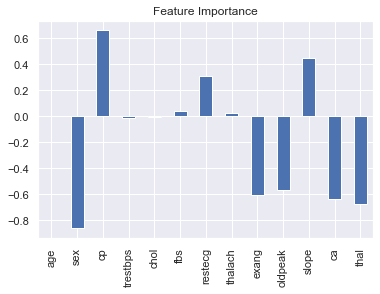

In [89]:
# Visualise feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [91]:
import pickle
# save an existing model to file
pickle.dump(model, open('HeartDisease_Pre2.pkl', 'wb'))

In [92]:
# load a saved model
loaded_pickle = pickle.load(open('HeartDisease_Pre2.pkl', 'rb'))
